In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


# Imports nécessaires

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


# Charger les données nettoyées
df = pd.read_csv('../data/processed/cleaned_data.csv')


# Afficher les 15 meilleurs joueurs en Ligue 2 et moins en xG overperf

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_17040\2422754839.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']


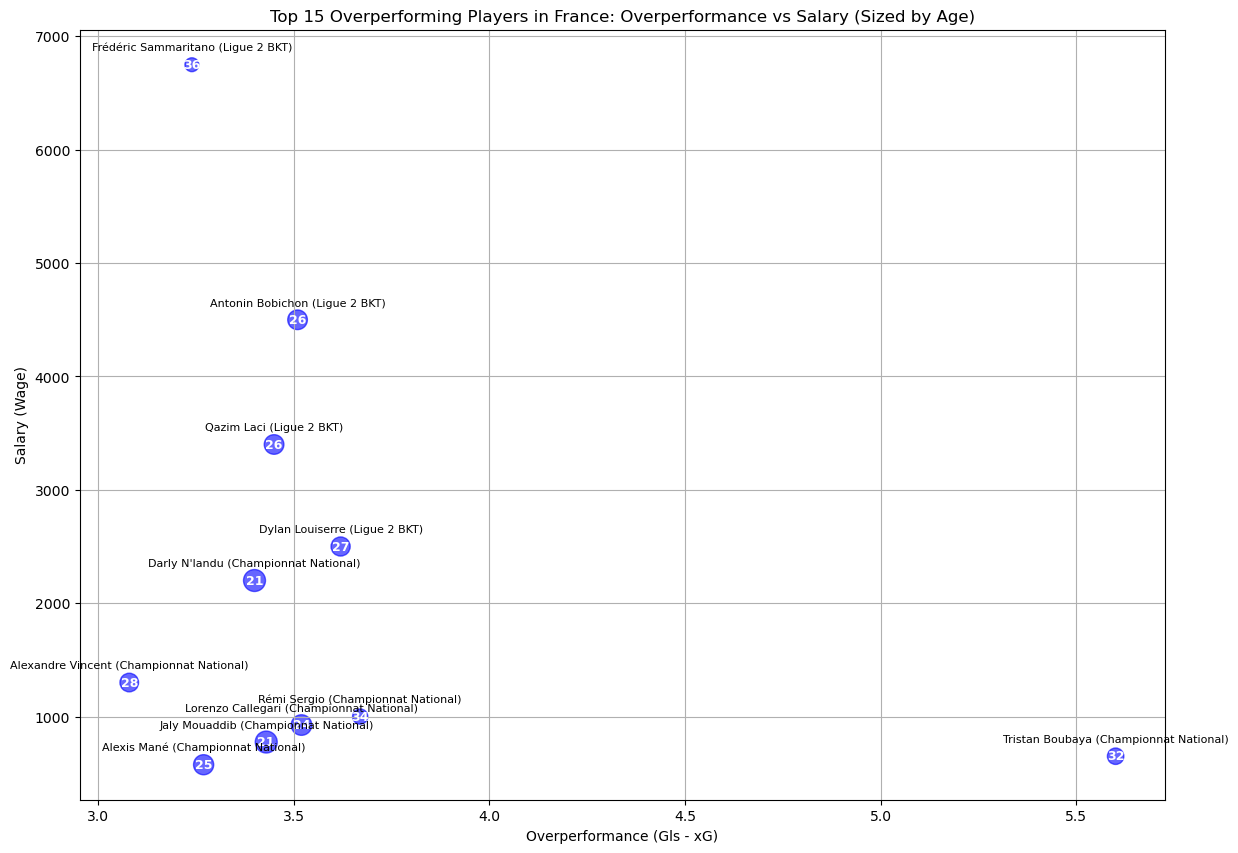

In [13]:

# Filtrer les joueurs qui évoluent en France
french_leagues = ["Ligue 2 BKT", "Championnat National", "Ligues régionales"]
df_france = df[df['Division'].isin(french_leagues)]

# Calculer l'overperformance des buteurs
df_france['Overperformance_Gls_xG'] = df_france['Goals'] - df_france['xG']

# Sélectionner les 15 premières overperformances
top_overperformers_france = df_france.nlargest(15, 'Overperformance_Gls_xG')

# Retirer les salaires supérieurs à 50000
top_overperformers_france = top_overperformers_france[top_overperformers_france['Wage'] <= 50000]

# Créer le scatter plot avec overperformance en X et salaire en Y
plt.figure(figsize=(14, 10))

# Calculer la taille des points en fonction de l'âge (plus jeune = plus gros)
age_factor = (top_overperformers_france['Age'].max() - top_overperformers_france['Age']) + 10
plt.scatter(top_overperformers_france['Overperformance_Gls_xG'], top_overperformers_france['Wage'], 
            s=age_factor * 10, color='blue', alpha=0.6)

# Ajouter les noms des joueurs, leur championnat et leur âge dans les points
for i in range(len(top_overperformers_france)):
    player_name = top_overperformers_france.iloc[i]['Name']
    league_name = top_overperformers_france.iloc[i]['Division']
    age = top_overperformers_france.iloc[i]['Age']
    x = top_overperformers_france.iloc[i]['Overperformance_Gls_xG']
    y = top_overperformers_france.iloc[i]['Wage']
    
    # Annoter l'âge au centre du cercle
    plt.annotate(f"{age}", (x, y), 
                 textcoords="offset points", xytext=(0, 0), ha='center', va='center', 
                 fontsize=9, color='white', weight='bold')

    # Annoter le nom et le championnat légèrement au-dessus du cercle
    plt.annotate(f"{player_name} ({league_name})", (x, y),
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8)

plt.xlabel('Overperformance (Gls - xG)')
plt.ylabel('Salary (Wage)')
plt.title('Top 15 Overperforming Players in France: Overperformance vs Salary (Sized by Age)')
plt.grid(True)
plt.show()


# Exploration des Données

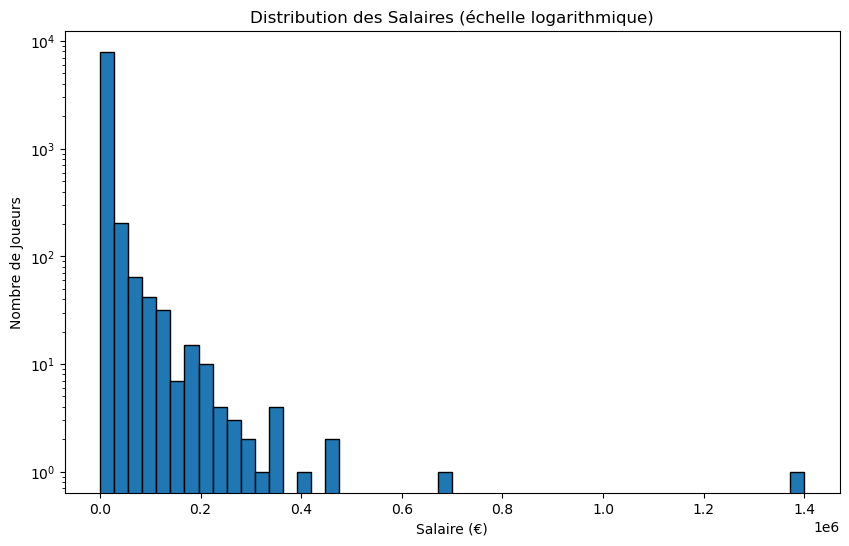

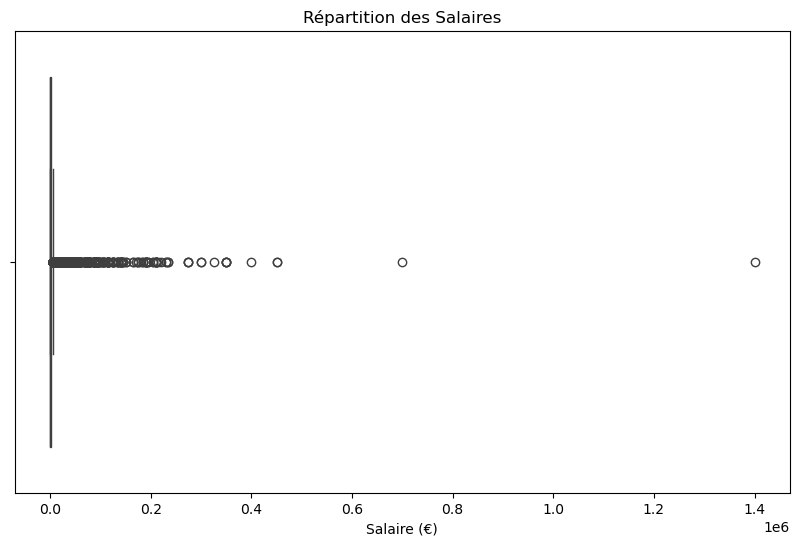

In [15]:
# Histogramme avec échelle logarithmique
plt.figure(figsize=(10, 6))
plt.hist(df['Wage'], bins=50, edgecolor='black', log=True)
plt.title('Distribution des Salaires (échelle logarithmique)')
plt.xlabel('Salaire (€)')
plt.ylabel('Nombre de Joueurs')
plt.show()

# Boxplot des salaires
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Wage'])
plt.title('Répartition des Salaires')
plt.xlabel('Salaire (€)')
plt.show()


# Analyse des corrélations entre les stats numériques

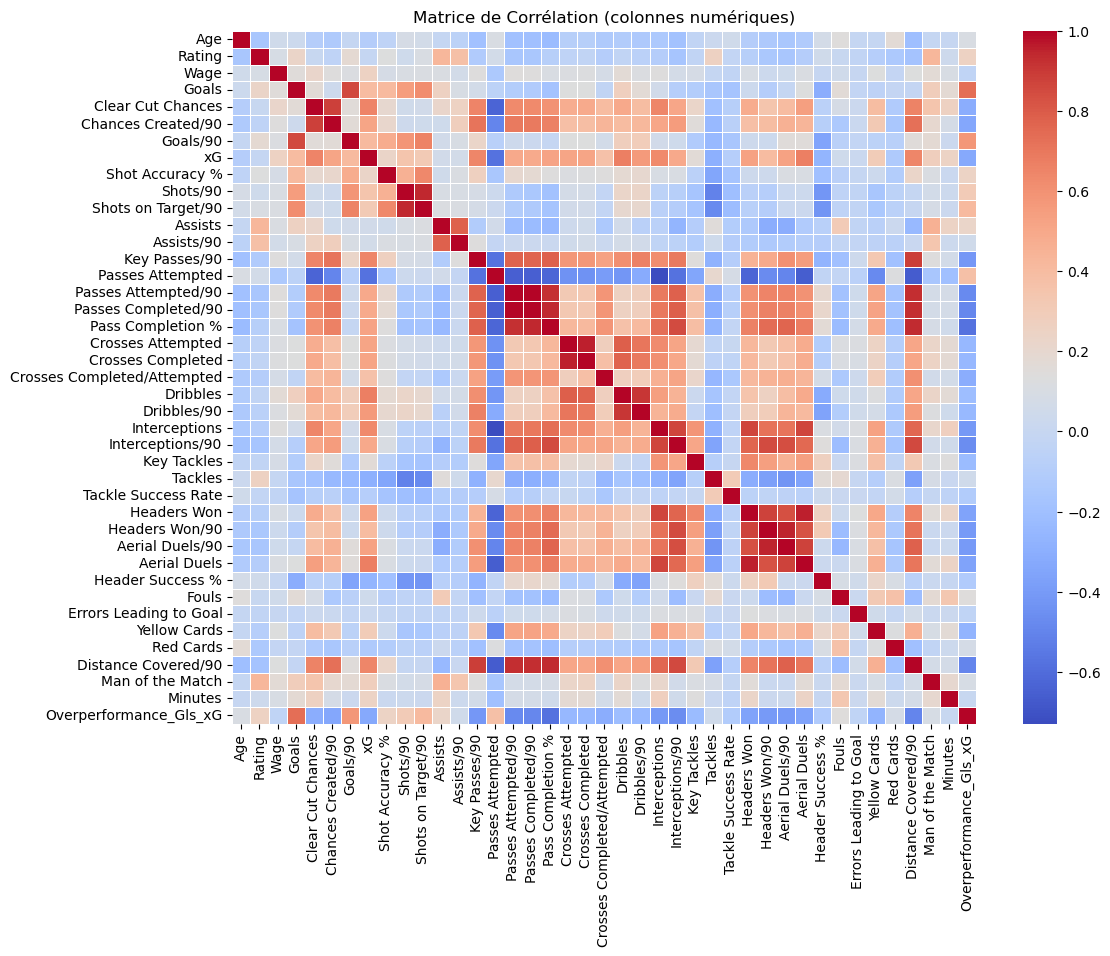

In [21]:

# Filtrer les colonnes numériques uniquement
numeric_df = df.select_dtypes(include=[float, int])
numeric_df = numeric_df.drop('ID', axis=1)

# Matrice de corrélation pour les colonnes numériques
plt.figure(figsize=(12, 9))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.7)
plt.title('Matrice de Corrélation (colonnes numériques)')
plt.show()


# Analyse des positions uniques

In [24]:
def categorize_midfielders(position):
    position = position.upper()
    
    if 'DM' in position:
        return 'Milieu Défensif'
    elif 'AM (C)' in position:
        return 'Milieu Offensif Central'
    elif 'M (C)' in position:
        return 'Milieu Central'
    else:
        return 'Autre'
# Appliquer la fonction de regroupement
df['Position_Categorized'] = df['Position'].apply(categorize_midfielders)

# Vérifiez la distribution après regroupement
position_categorized_counts = df['Position_Categorized'].value_counts()
print(position_categorized_counts)


Position_Categorized
Milieu Défensif            3532
Milieu Central             3129
Milieu Offensif Central    2384
Autre                       852
Name: count, dtype: int64


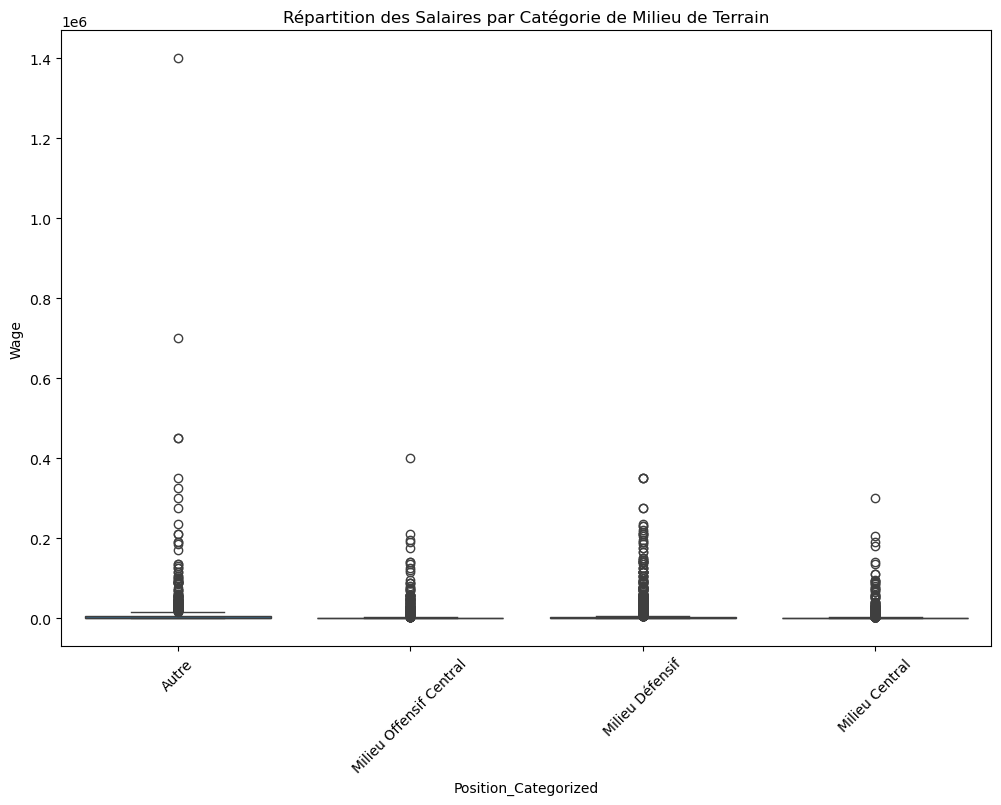

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Position_Categorized', y='Wage', data=df)
plt.xticks(rotation=45)
plt.title('Répartition des Salaires par Catégorie de Milieu de Terrain')
plt.show()

# Identification des Joueurs Performants

                      Name                       Division  Goals  \
2696    Jort van der Sande        Keuken Kampioen Divisie     22   
2546            Jaze Kabia               cinch League One     20   
2971         Aaron Collins             Sky Bet League Two     20   
7332       Willie Faulkner     Bluefin Sport Championship     13   
1347         Denys Harmash                    FavBet Liha     12   
1032   Baptiste Santamaria              Ligue 1 Uber Eats     13   
1316   Maxim Plakushchenko  Ligat Tel Aviv Stock Exchange     12   
1296  Jakub Błaszczykowski                PKO Ekstraklasa     12   
1432         Alassane Ndao            Spor Toto Süper Lig     17   
6461        Daniel Sebesta                        2. Liga     16   
754          Yanis Rahmani               LaLiga SmartBank     14   
1027              Pep Biel                   3F Superliga     17   
6019         Tony Dingwall               cinch League Two     12   
1492         Bohdan Lednev                  OTP 

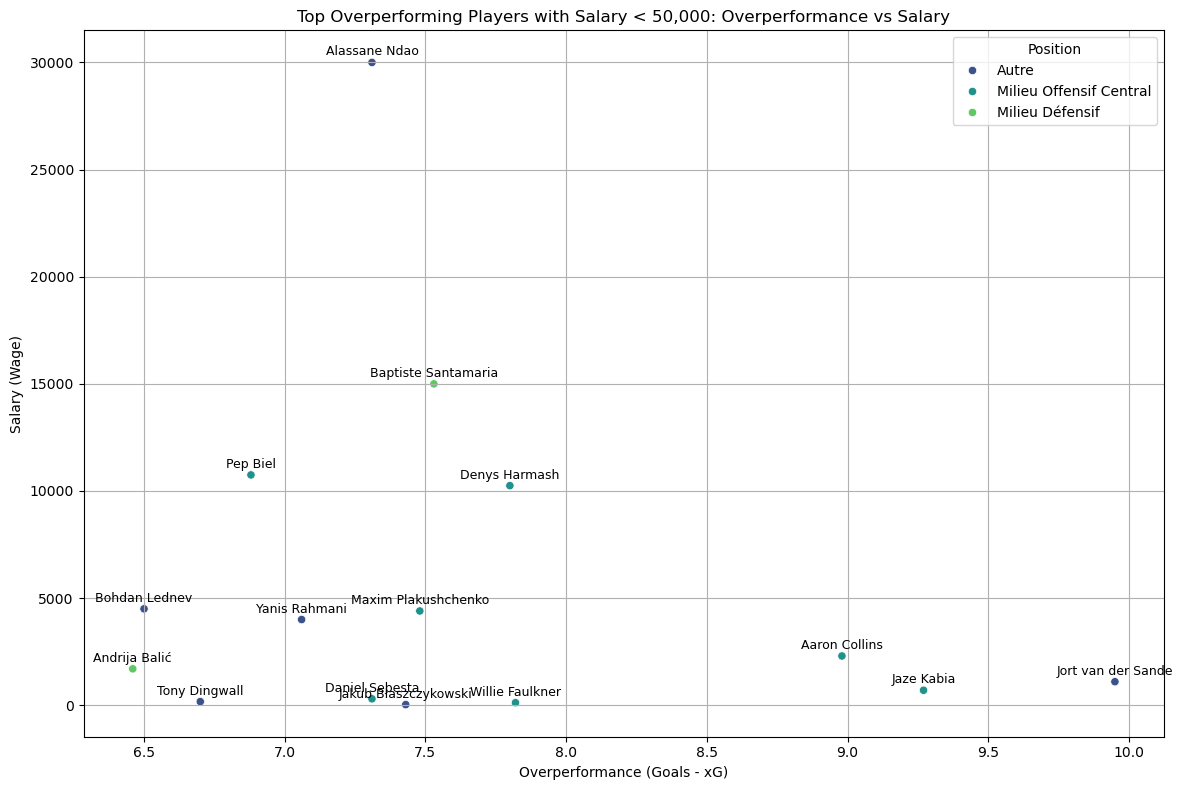

In [52]:
# Calculer la différence entre les buts marqués et les xG
df_filtered_xG = df.copy()  # Utiliser copy() pour éviter les modifications sur l'original

df_filtered_xG['Difference_Gls_xG'] = df_filtered_xG['Goals'] - df_filtered_xG['xG']

# Filtrer pour les joueurs où la différence est inférieure ou égale à 50% des buts marqués
df_filtered_xG_realistic = df_filtered_xG[df_filtered_xG['Difference_Gls_xG'] <= 0.7 * df_filtered_xG['Goals']]

# Filtrer les joueurs avec un salaire inférieur à 50 000
df_filtered_xG_realistic = df_filtered_xG_realistic[df_filtered_xG_realistic['Wage'] < 50000]

# Identifier les joueurs surperformants après ce filtrage
df_filtered_xG_realistic['Overperf_Gls_xG'] = df_filtered_xG_realistic['Goals'] - df_filtered_xG_realistic['xG']
top_overperformers_realistic = df_filtered_xG_realistic.nlargest(15, 'Overperf_Gls_xG')

# Afficher les résultats
print(top_overperformers_realistic[['Name', 'Division', 'Goals', 'Overperf_Gls_xG', 'Wage']])

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperf_Gls_xG', y='Wage', hue='Position_Categorized', data=top_overperformers_realistic, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(top_overperformers_realistic)):
    player_name = top_overperformers_realistic.iloc[i]['Name']
    overperformance = top_overperformers_realistic.iloc[i]['Overperf_Gls_xG']
    wage = top_overperformers_realistic.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming Players with Salary < 50,000: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.legend(title='Position')
plt.grid(True)
plt.tight_layout()
plt.show()


# Analyse des français qui Overperf leurs xG

C:\Users\BBE22983\AppData\Local\Temp\ipykernel_17040\4131826170.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_xG_realistic_fra['Overperf_Gls_xG'] = df_filtered_xG_realistic_fra['Goals'] - df_filtered_xG_realistic_fra['xG']


                      Name                       Club  \
1032   Baptiste Santamaria                     Rennes   
754          Yanis Rahmani                      Eibar   
4193       Tristan Boubaya                 Concarneau   
1509          Mahdi Camara              Saint-Étienne   
1755       Dylan Louiserre                      Niort   
1545      Antonin Bobichon                      Nancy   
3820         Darly N'landu               US Avranches   
4624           Alexis Mané                    Sète 34   
5576          Hugo Fargues                    Yverdon   
1617  Frédéric Sammaritano                      Dijon   
5195     Francis Dady Ngoy  Thonon Evian Grand Geneve   
5108      Alexandre Fillon                  FC Annecy   
3965        Timothée Dieng                Exeter City   
7469           Steve Tanga                   Postojna   
1894         Romain Grange                Châteauroux   

                                      Division  Goals  Overperf_Gls_xG  \
1032         

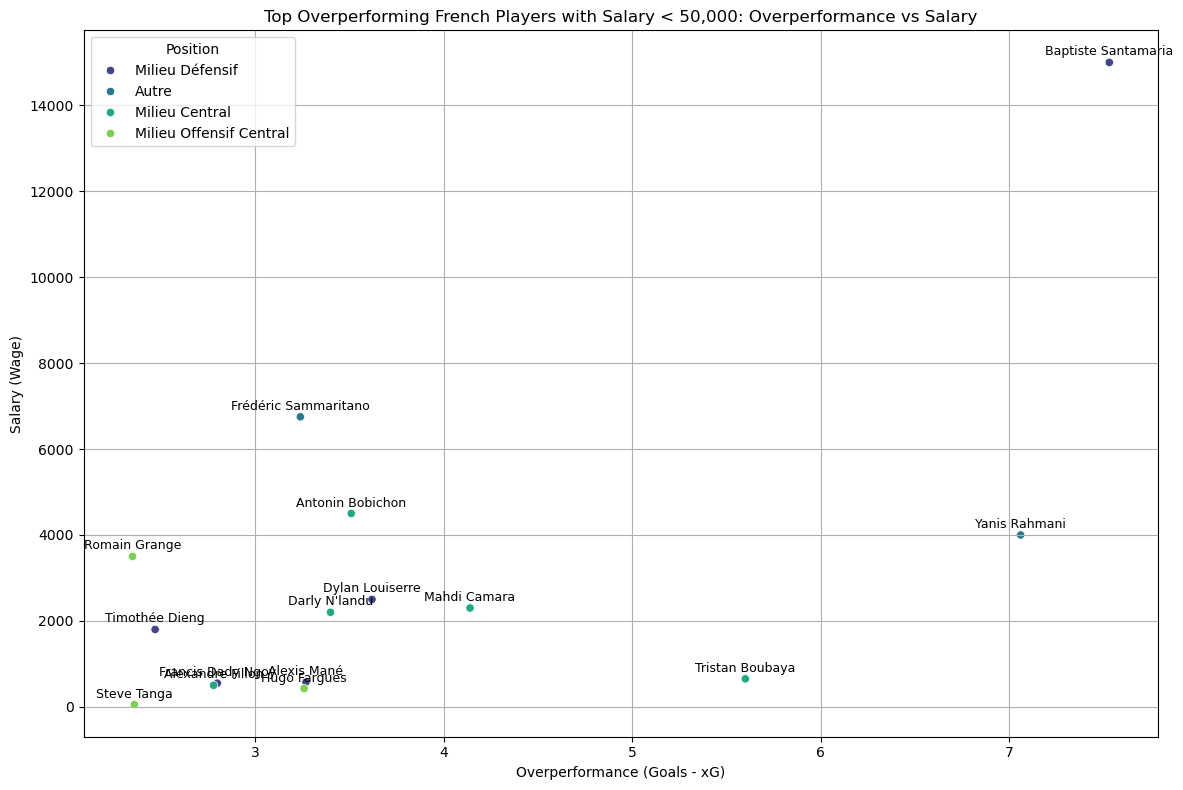

In [66]:
# Filtrer par nationalité française
df_filtered_xG_realistic_fra = df_filtered_xG_realistic[df_filtered_xG_realistic['Nationality'] == 'FRA']

# Identifier les joueurs surperformants après ce filtrage
df_filtered_xG_realistic_fra['Overperf_Gls_xG'] = df_filtered_xG_realistic_fra['Goals'] - df_filtered_xG_realistic_fra['xG']
top_overperformers_realistic_fra = df_filtered_xG_realistic_fra.nlargest(15, 'Overperf_Gls_xG')

# Afficher les résultats
print(top_overperformers_realistic_fra[['Name', 'Club', 'Division', 'Goals', 'Overperf_Gls_xG', 'Wage']])

# Créer le graphique
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overperf_Gls_xG', y='Wage', hue='Position_Categorized', data=top_overperformers_realistic_fra, palette='viridis')

# Ajouter les noms des joueurs
for i in range(len(top_overperformers_realistic_fra)):
    player_name = top_overperformers_realistic_fra.iloc[i]['Name']
    overperformance = top_overperformers_realistic_fra.iloc[i]['Overperf_Gls_xG']
    wage = top_overperformers_realistic_fra.iloc[i]['Wage']
    
    plt.annotate(
        player_name, 
        (overperformance, wage),
        textcoords="offset points",
        xytext=(0,5), 
        ha='center',
        fontsize=9,
        color='black'
    )

# Personnaliser le graphique
plt.title('Top Overperforming French Players with Salary < 50,000: Overperformance vs Salary')
plt.xlabel('Overperformance (Goals - xG)')
plt.ylabel('Salary (Wage)')
plt.legend(title='Position')
plt.grid(True)
plt.tight_layout()
plt.show()


